In [2]:
import os
import pandas as pd
import sqlite3 as sql

In [3]:
df = pd.read_csv('../data/main_data/main_data_understat.csv')

In [4]:
df.columns

Index(['date', 'name', 'first_name', 'last_name', 'club', 'goals', 'own_goals',
       'shots', 'xG', 'time', 'game_position', 'h_a', 'yellow_card',
       'red_card', 'key_passes', 'assists', 'xA', 'xGChain', 'xGBuildup',
       'date_of_birth', 'sub_position', 'position', 'foot', 'height_in_cm',
       'transfered', 'transfered_from', 'transfered_to', 'transfer_fee',
       'market_value_in_eur'],
      dtype='object')

In [6]:
player_name = "erling haaland"  # Specify the player's name you want to filter

# Filter the result DataFrame for the specified player
player_data = df.loc[df['name'] == player_name]

# Display the filtered data
player_data

,date,name,first_name,last_name,club,goals,own_goals,shots,xG,time,...,date_of_birth,sub_position,position,foot,height_in_cm,transfered,transfered_from,transfered_to,transfer_fee,market_value_in_eur
273991,2020-01-18 14:30:00,erling haaland,erling,haaland,Borussia Dortmund,3,0,3,1.322790,33,...,2000-07-21 00:00:00,Centre-Forward,Attack,left,195.0,no,Borussia Dortmund,Borussia Dortmund,0.0,60000000.0
275093,2020-01-24 19:30:00,erling haaland,erling,haaland,Borussia Dortmund,2,0,3,1.333330,23,...,2000-07-21 00:00:00,Centre-Forward,Attack,left,195.0,no,Borussia Dortmund,Borussia Dortmund,0.0,60000000.0
276249,2020-02-01 14:30:00,erling haaland,erling,haaland,Borussia Dortmund,2,0,2,0.782964,77,...,2000-07-21 00:00:00,Centre-Forward,Attack,left,195.0,no,Borussia Dortmund,Borussia Dortmund,0.0,60000000.0
277833,2020-02-08 17:30:00,erling haaland,erling,haaland,Borussia Dortmund,0,0,2,0.106622,90,...,2000-07-21 00:00:00,Centre-Forward,Attack,left,195.0,no,Borussia Dortmund,Borussia Dortmund,0.0,60000000.0
278445,2020-02-14 19:30:00,erling haaland,erling,haaland,Borussia Dortmund,1,0,2,0.694099,80,...,2000-07-21 00:00:00,Centre-Forward,Attack,left,195.0,no,Borussia Dortmund,Borussia Dortmund,0.0,60000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508786,2024-08-24 14:00:00,erling haaland,erling,haaland,Manchester City,3,0,7,1.840464,90,...,2000-07-21 00:00:00,Centre-Forward,Attack,left,195.0,no,Manchester City Football Club,Manchester City Football Club,0.0,200000000.0
509313,2024-08-31 16:30:00,erling haaland,erling,haaland,Manchester City,3,0,5,1.313665,90,...,2000-07-21 00:00:00,Centre-Forward,Attack,left,195.0,no,Manchester City Football Club,Manchester City Football Club,0.0,200000000.0
509738,2024-09-14 14:00:00,erling haaland,erling,haaland,Manchester City,2,0,6,0.730458,90,...,2000-07-21 00:00:00,Centre-Forward,Attack,left,195.0,no,Manchester City Football Club,Manchester City Football Club,0.0,200000000.0
510434,2024-09-22 15:30:00,erling haaland,erling,haaland,Manchester City,1,0,6,0.829185,90,...,2000-07-21 00:00:00,Centre-Forward,Attack,left,195.0,no,Manchester City Football Club,Manchester City Football Club,0.0,200000000.0


In [7]:
len(df)

510937

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_4359/4010873117.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='position', data=df, palette='Set2')


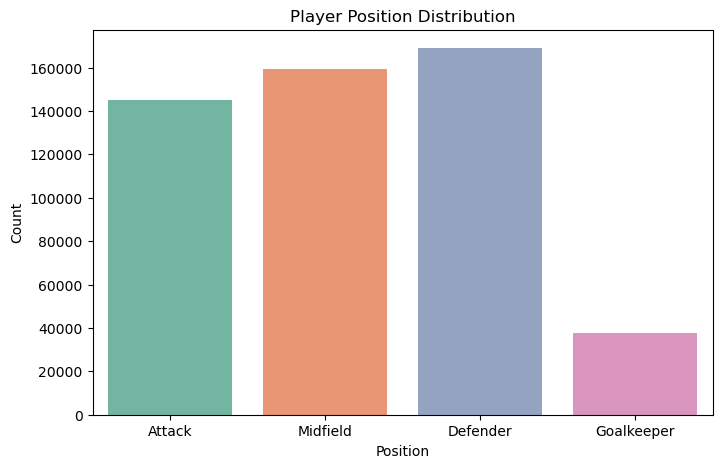

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x='position', data=df, palette='Set2')
plt.title('Player Position Distribution')
plt.xlabel('Position')
plt.ylabel('Count')
plt.show()


In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
df['date']

0        2014-08-01 17:00:00
1        2014-08-01 17:00:00
2        2014-08-01 17:00:00
3        2014-08-01 17:00:00
4        2014-08-01 17:00:00
                 ...        
510932   2024-09-29 16:00:00
510933   2024-09-29 16:00:00
510934   2024-09-29 16:00:00
510935   2024-09-29 16:00:00
510936   2024-09-29 16:00:00
Name: date, Length: 510937, dtype: datetime64[ns]

### We can use cumulative metrics. For each player, we create cumulative sums of performance metrics up to each date. This will give us the total number of goals, assists, and other performance indicators up to a given date for each player

In [12]:
# Sort by player and date
df = df.sort_values(by=['name', 'date'])

# Cumulative sums by player
df['cumulative_goals'] = df.groupby('name')['goals'].cumsum()
df['cumulative_own_goals'] = df.groupby('name')['own_goals'].cumsum()
df['cumulative_time'] = df.groupby('name')['time'].cumsum()
df['cumulative_key_passes'] = df.groupby('name')['key_passes'].cumsum()
df['cumulative_assists'] = df.groupby('name')['assists'].cumsum()
df['cumulative_shots'] = df.groupby('name')['shots'].cumsum()
df['cumulative_xG'] = df.groupby('name')['xG'].cumsum()
df['cumulative_xA'] = df.groupby('name')['xA'].cumsum()
df['cumulative_xGChain'] = df.groupby('name')['xGChain'].cumsum()
df['cumulative_xGBuildup'] = df.groupby('name')['xGBuildup'].cumsum()
df['cumulative_yellow_cards'] = df.groupby('name')['yellow_card'].cumsum()
df['cumulative_red_cards'] = df.groupby('name')['red_card'].cumsum()

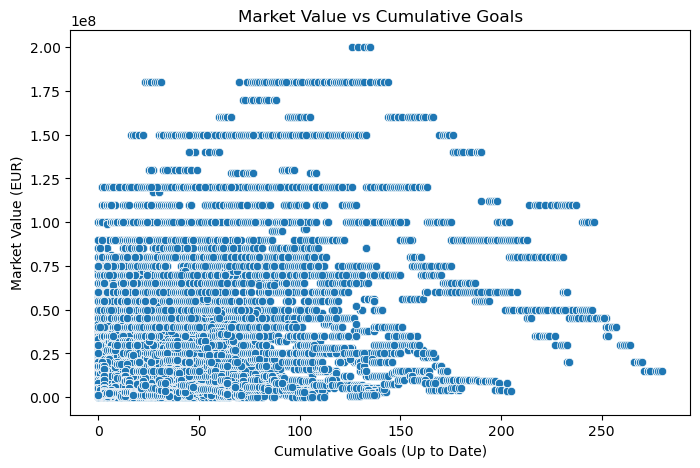

In [14]:
#Market Value vs. Cumulative Goals

plt.figure(figsize=(8, 5))
sns.scatterplot(x='cumulative_goals', y='market_value_in_eur', data=df)
plt.title('Market Value vs Cumulative Goals')
plt.xlabel('Cumulative Goals (Up to Date)')
plt.ylabel('Market Value (EUR)')
plt.show()

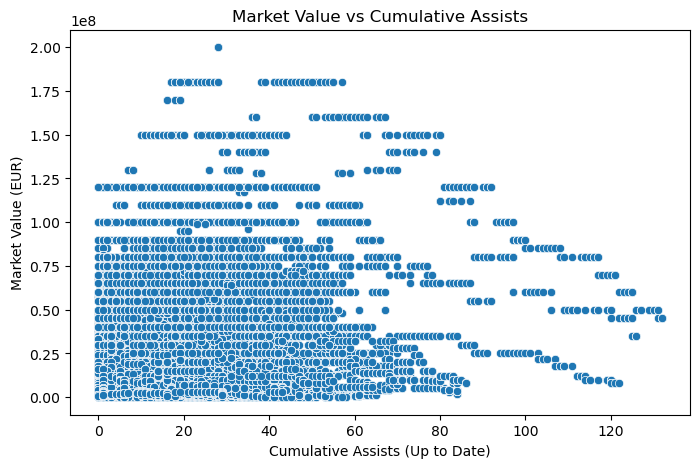

In [15]:
#Market Value vs. Cumulative Assists
plt.figure(figsize=(8, 5))
sns.scatterplot(x='cumulative_assists', y='market_value_in_eur', data=df)
plt.title('Market Value vs Cumulative Assists')
plt.xlabel('Cumulative Assists (Up to Date)')
plt.ylabel('Market Value (EUR)')
plt.show()

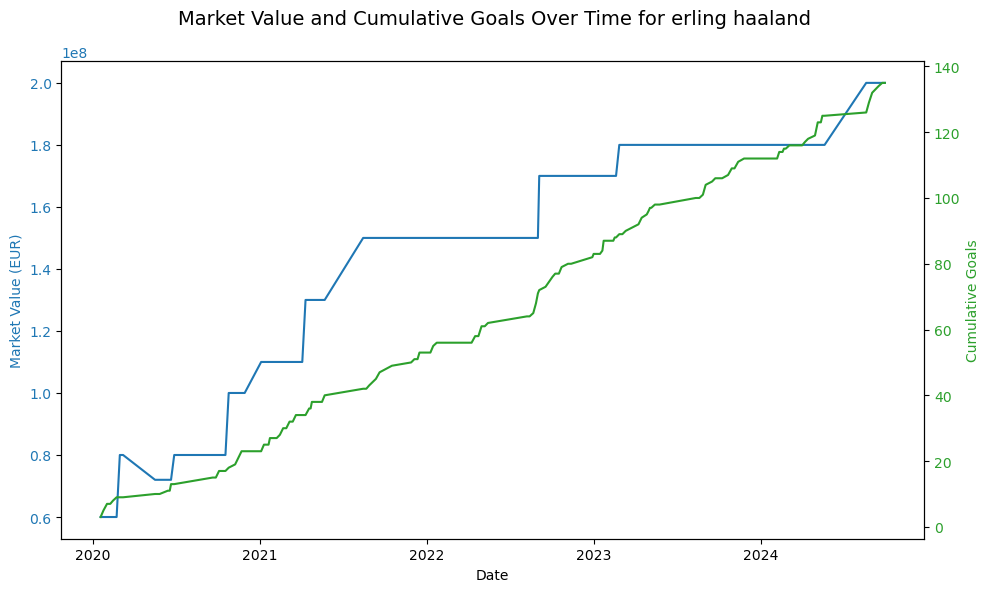

In [18]:
#Time Series of Market Value and Cumulative Goals

# Example for a specific player
player_name = 'erling haaland'
player_data = df[df['name'] == player_name]

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot market value on the left y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Market Value (EUR)', color='tab:blue')
ax1.plot(player_data['date'], player_data['market_value_in_eur'], color='tab:blue', label='Market Value')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot cumulative goals
ax2 = ax1.twinx()  
ax2.set_ylabel('Cumulative Goals', color='tab:green')  
ax2.plot(player_data['date'], player_data['cumulative_goals'], color='tab:green', label='Cumulative Goals')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Add titles and legends
fig.suptitle(f'Market Value and Cumulative Goals Over Time for {player_name}', fontsize=14)
fig.tight_layout()  # Adjust layout to fit both y-axes

plt.show()



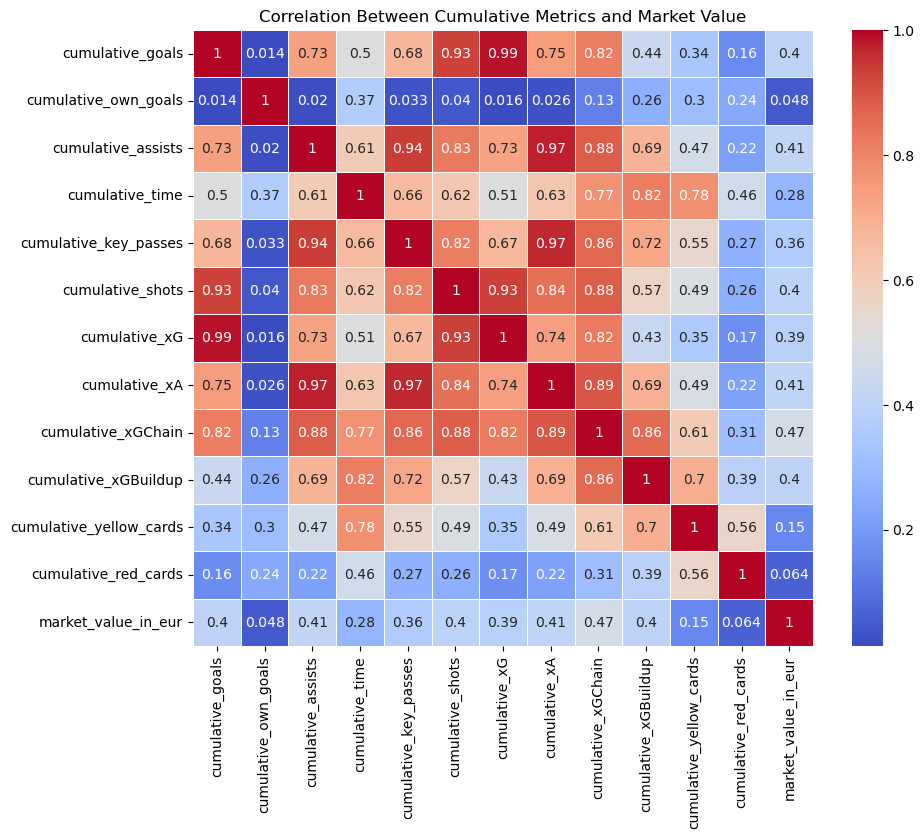

In [20]:
#Heatmap of Correlations Over Time

cumulative_metrics = ['cumulative_goals', 'cumulative_own_goals', 'cumulative_assists', 'cumulative_time', 'cumulative_key_passes', 'cumulative_shots', 
                      'cumulative_xG', 'cumulative_xA', 'cumulative_xGChain', 'cumulative_xGBuildup', 'cumulative_yellow_cards', 'cumulative_red_cards']

plt.figure(figsize=(10, 8))
correlation_matrix = df[cumulative_metrics + ['market_value_in_eur']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Cumulative Metrics and Market Value')
plt.show()